In [14]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as im

In [21]:
from google.colab import drive
drive.mount('/content/drive')

default_path = '/content/drive/My Drive'
sub_path = '/colab_python/linear_algebra/data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
src = im.imread(default_path + sub_path + '/puppy_01.jpg')
src

Array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [35]:
src.shape
src[10,10]

Array([255, 255, 255], dtype=uint8)

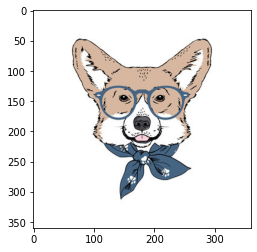

In [24]:
plt.imshow(src)

In [47]:
def linear_transformation(img, a):
    m, n, _ = img.shape
    corners = np.array([[0,0,n-1,n-1],[0,m-1,0,m-1]])
    new_points = a.dot(corners).astype(int)

    xcoord = new_points[0,:]
    ycoord = new_points[1,:]
    minx = np.amin(xcoord)
    maxx = np.amax(xcoord)
    miny = np.amin(ycoord)
    maxy = np.amax(ycoord)

    new_n = maxx-minx+1
    new_m = maxy-miny+1
    dest = np.full((new_m,new_n,3),200)

    y = miny
    for i in range(new_m):
        x = minx
        for j in range(new_n):
            pts = np.array([[x],[y]])
            #원본 이미지 위치 계산 : 역행렬 이용
            new_pts = np.linalg.inv(a).dot(pts).round().astype(int)
            if (new_pts[0] >= 0 and new_pts[0] < n and new_pts[1] >= 0 
               and new_pts[1] < m):
               dest[i,j,:] = img[new_pts[1], new_pts[0],:]
            x += 1
        y += 1
    return dest


In [41]:
def translation(img,dist):
    m,n,_ = img.shape
    steps = np.absolute(dist)

    new_m = m + 2*steps[1]
    new_n = n + 2*steps[0]
    dest = np.full((new_m,new_n, 3),200)
    for i in range(new_m):
        for j in range(new_n):
            yp=i-dist[0]
            xp=j-dist[1]
            if xp >= 0 and xp < n and yp >= 0 and yp < m:
                dest[i,j,:] = img[yp,xp,:]
    return dest

In [38]:
    m, n, _ = src.shape
    corners = np.array([[0,0,n-1,n-1],[0,m-1,0,m-1]])
    new_points = np.array([[1,3],[0,1]]).dot(corners).astype(int)

    xcoord = new_points[0,:]
    ycoord = new_points[1,:]

print(corners)
print(new_points)

[[  0   0 359 359]
 [  0 359   0 359]]
[[   0 1077  359 1436]
 [   0  359    0  359]]


In [42]:
print(xcoord)
print(ycoord)

[   0 1077  359 1436]
[  0 359   0 359]


In [ ]:
a = np.array([[1.5, 0],[0,0.8]])
dst = linear_transformation(src,a)

In [53]:
theta = np.pi/4
a_rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta),np.cos(theta)]])
dst_rot = linear_transformation(src,a_rot)

In [55]:
a_shr = np.array([[1,0.5],[0,1]])
dst_shear = linear_transformation(src,a_shr)

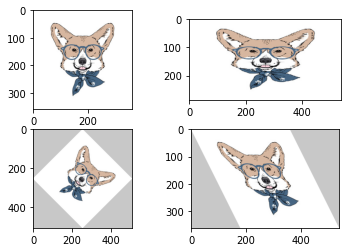

In [57]:
plt.subplot(2,2,1)
plt.imshow(src)
plt.subplot(2,2,2)
plt.imshow(dst)
plt.subplot(2,2,3)
plt.imshow(dst_rot)
plt.subplot(2,2,4)
plt.imshow(dst_shear)